In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
# Read the CSV file with the first row as headers
df_matches = pd.read_csv('Wimbledon_featured_matches.csv', header=0)
# Print the first few rows to verify
print("\nFeatured Matches (initial):")
print(df_matches.head())


# # Save each match as a separate CSV (done)
# grouped_matches = dict(tuple(df_matches.groupby('match_id')))

# # Display keys of the dictionary to show match IDs
# print("Match IDs:", grouped_matches.keys())
# for match_id, match_df in grouped_matches.items():
#     match_df.to_csv(f'match_{match_id}.csv', index=False)
#     print(f"Saved match_{match_id}.csv")


Featured Matches (initial):
              match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run 

Correlation Matrix:
                      set_no   game_no  point_no   p1_sets   p2_sets  \
set_no              1.000000  0.007026  0.940838  0.802624  0.750308   
game_no             0.007026  1.000000  0.254884  0.016176 -0.006406   
point_no            0.940838  0.254884  1.000000  0.774134  0.684866   
p1_sets             0.802624  0.016176  0.774134  1.000000  0.207886   
p2_sets             0.750308 -0.006406  0.684866  0.207886  1.000000   
p1_games            0.045104  0.933821  0.272156  0.056889  0.010914   
p2_games           -0.032830  0.930846  0.202385 -0.027622 -0.023222   
server              0.015344 -0.023248  0.010161  0.025259 -0.002833   
serve_no           -0.011874 -0.029757 -0.019215  0.000968 -0.020545   
point_victor       -0.026504 -0.003713 -0.026513 -0.035205 -0.004445   
p1_points_won       0.932232  0.252237  0.993671  0.816327  0.623991   
p2_points_won       0.937080  0.253895  0.992897  0.719008  0.739800   
game_victor        -0.005480 -0.018829  0.00

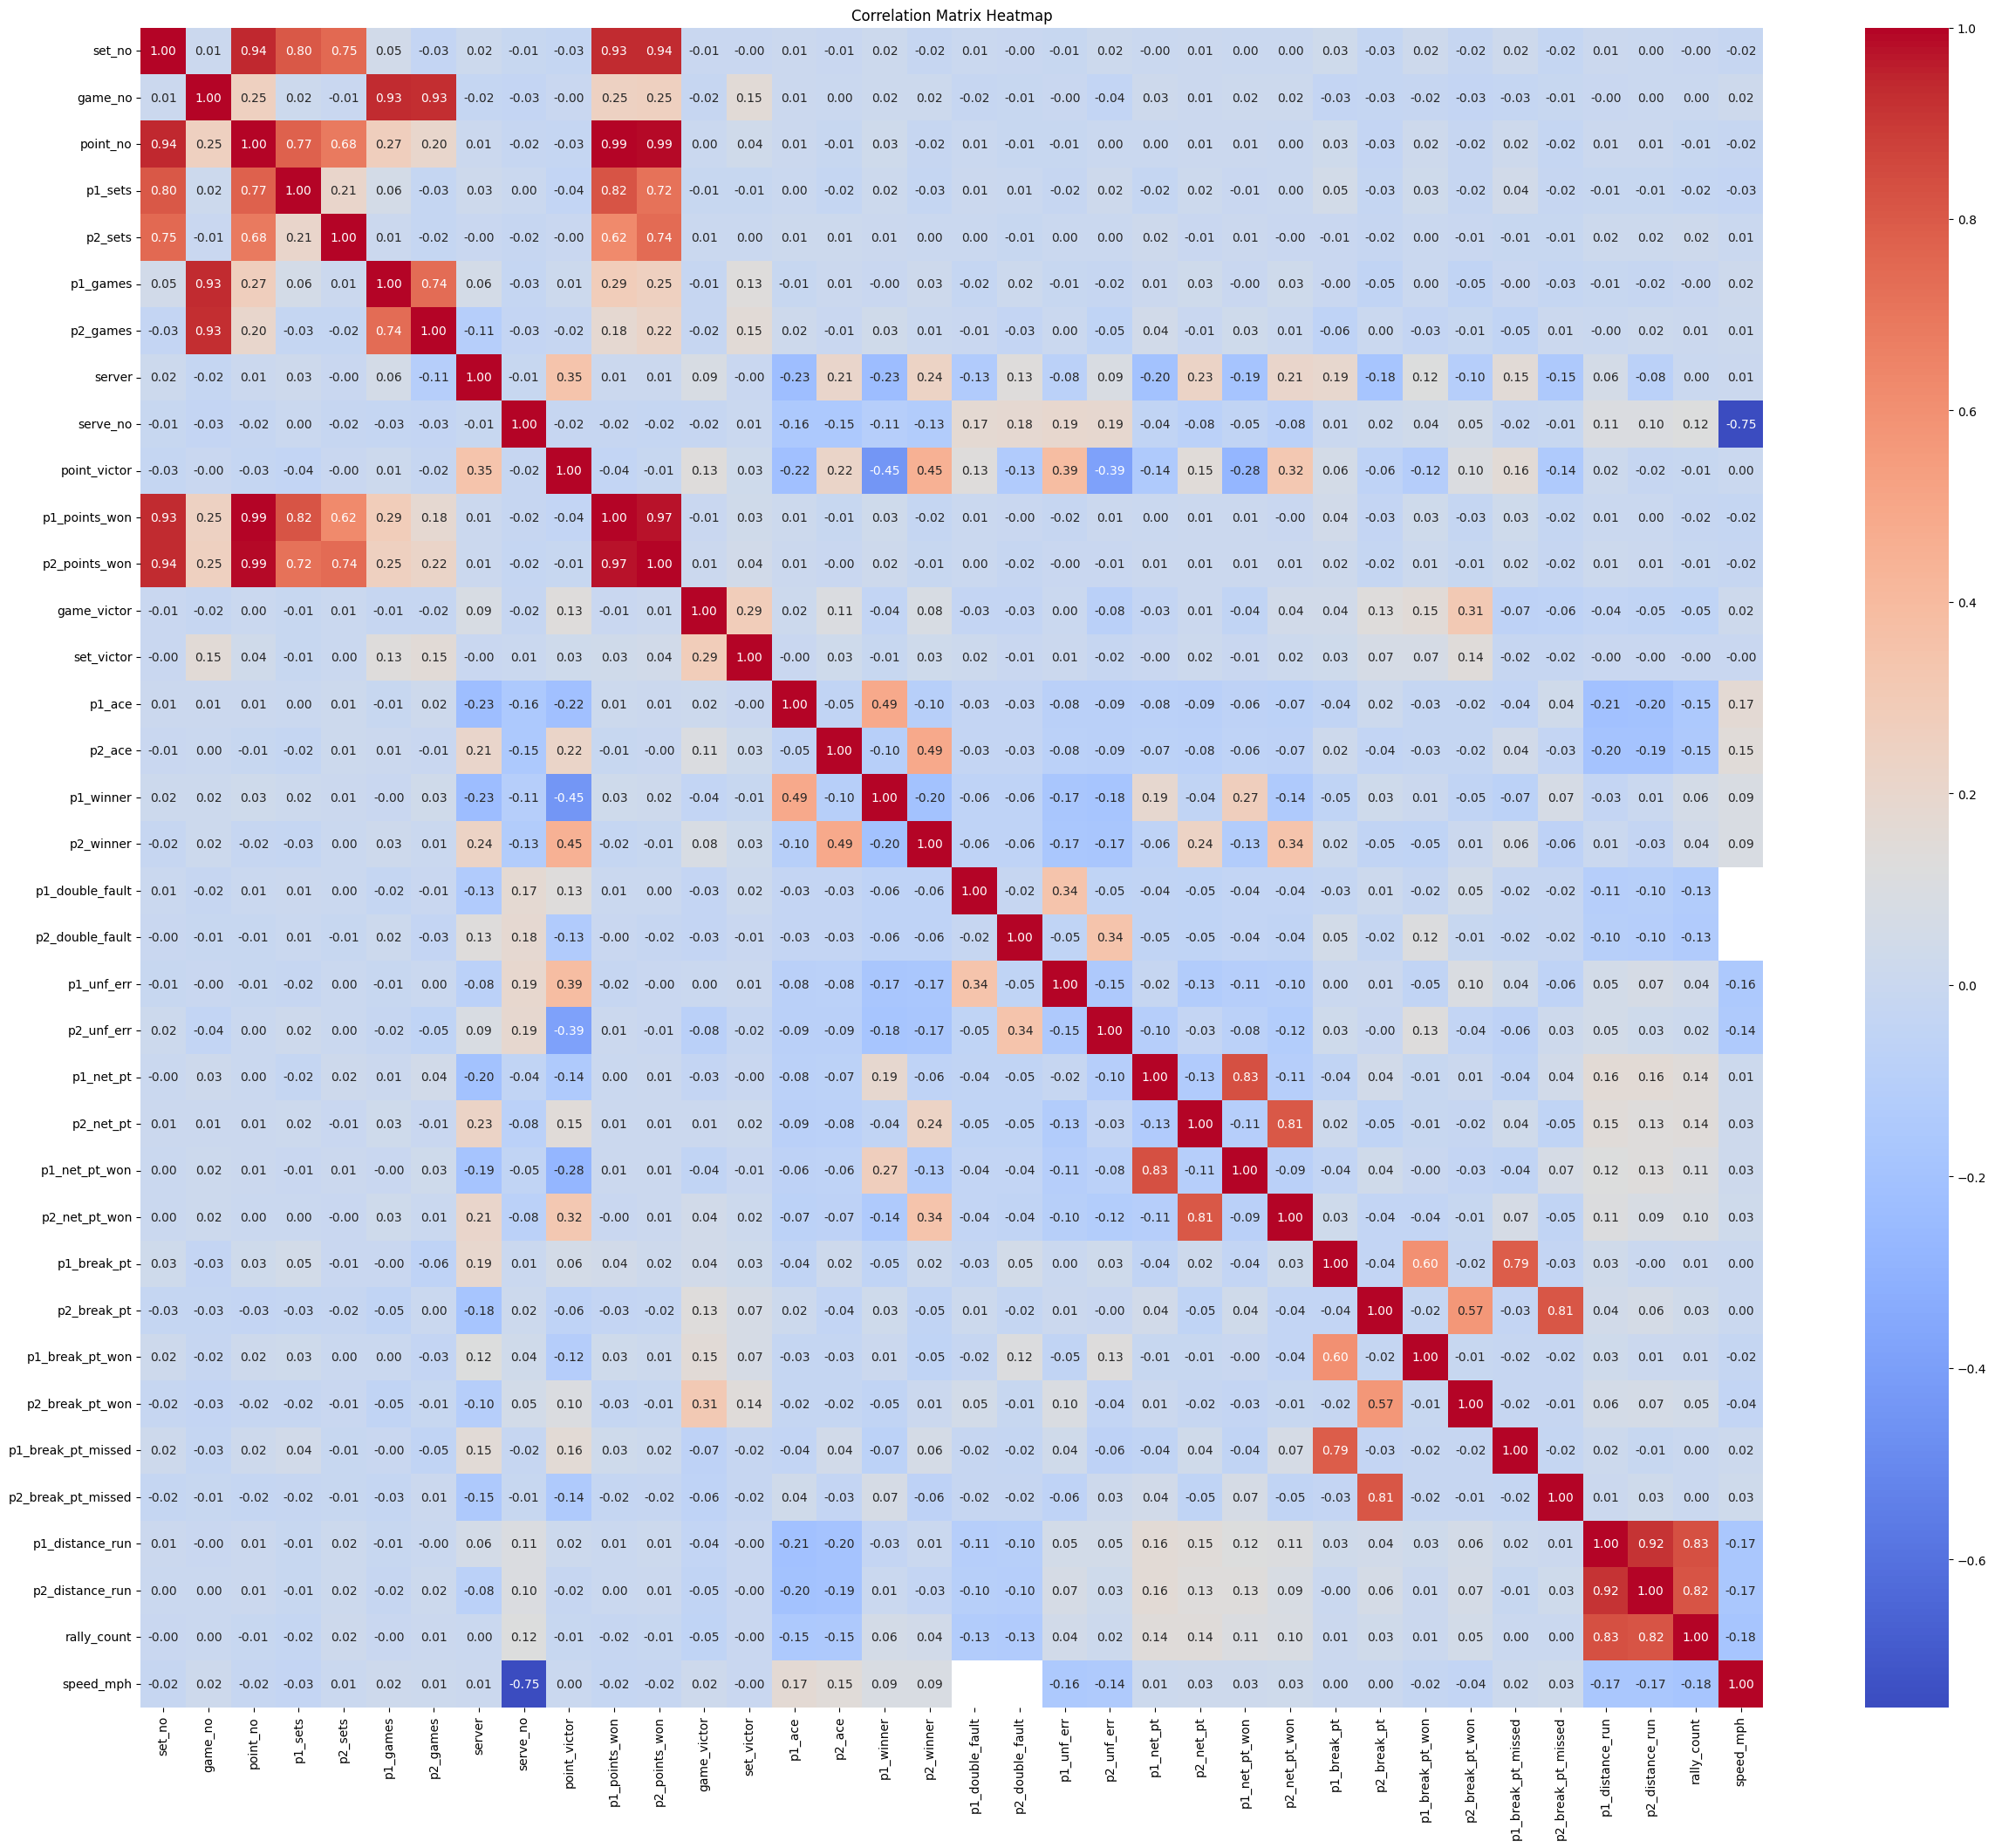

In [ ]:
#Look for Correlation Between Variables Using Correlation Matrix:

# Select numeric columns only
numeric_columns = df_matches.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
print("Correlation Matrix:")
print(correlation_matrix)
#plot the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


Filtered Correlation Matrix (Strong Correlations):


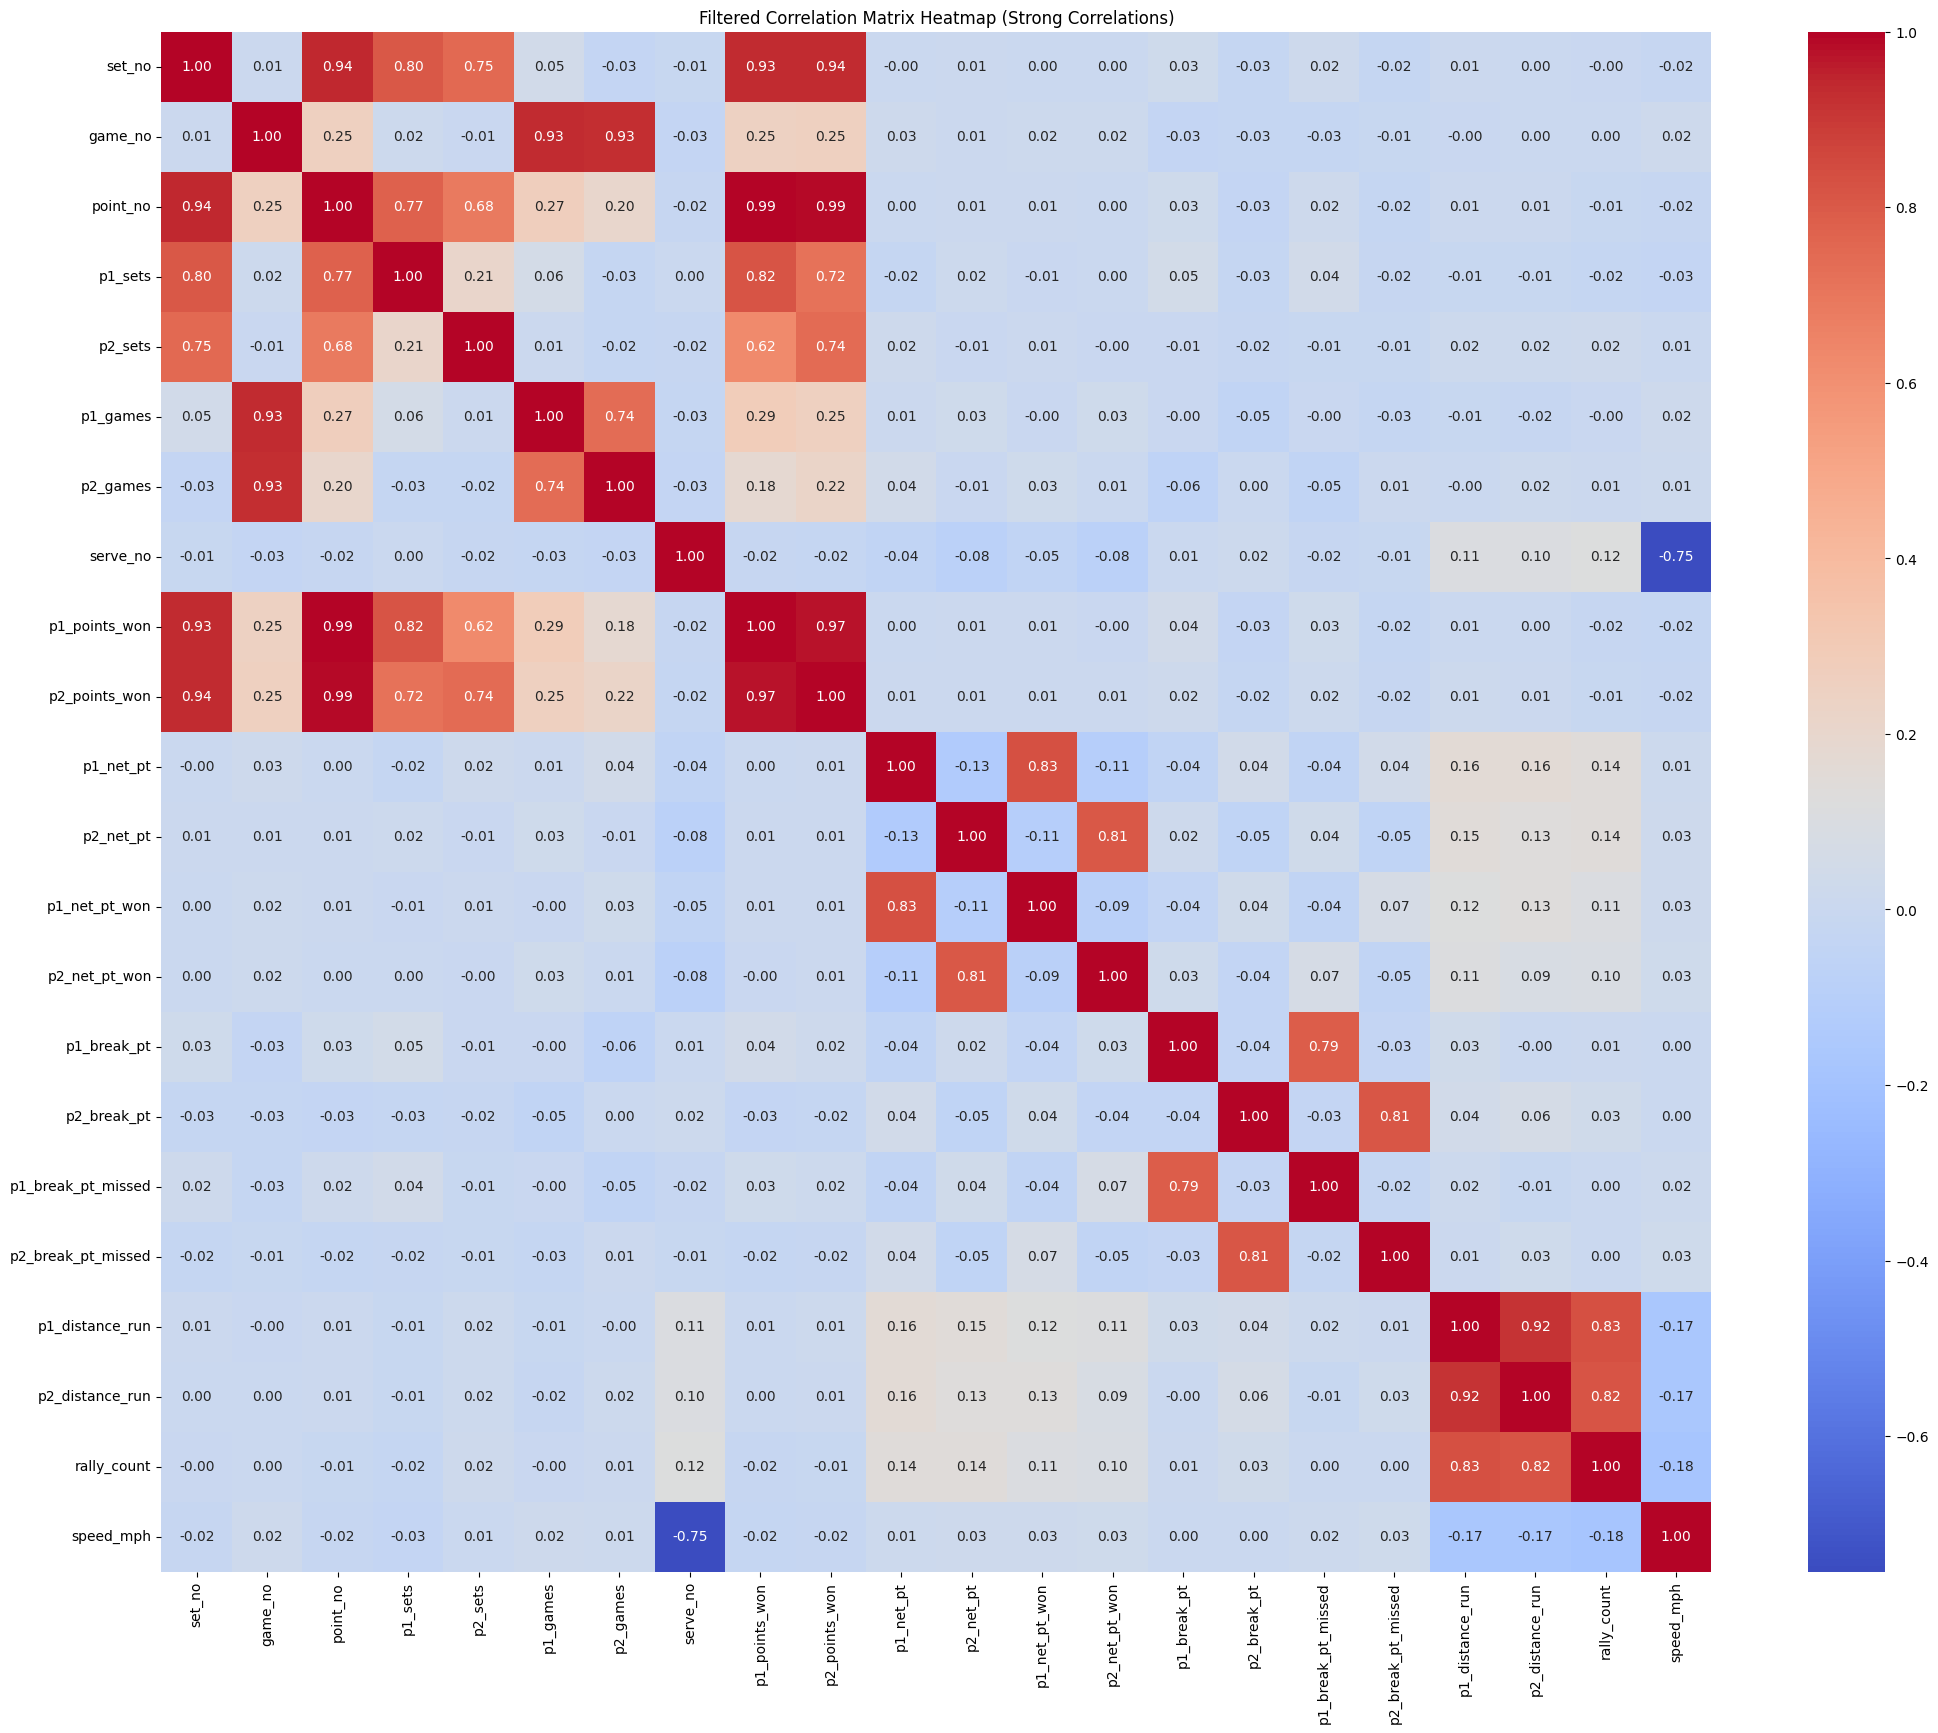

In [ ]:
threshold=0.65
strong_correlation = (abs(correlation_matrix)>threshold).sum(axis=1)>1
filtered_matrix = correlation_matrix.loc[strong_correlation,strong_correlation]
# Print the filtered matrix

print("Filtered Correlation Matrix (Strong Correlations):")
# Visualize the filtered matrix with a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(filtered_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Filtered Correlation Matrix Heatmap (Strong Correlations)")
plt.show()

In [ ]:
#Stats for Match1
match1= pd.read_csv("match_2023-wimbledon-1301.csv")
player1_serving = match1[match1['server'] == 1]
player2_serving = match1[match1['server'] == 2]


# Calculate the serve win probability for player1
# Points won by player1 when serving / Total points served by player1
serve_win_probability_player1 = player1_serving['point_victor'].value_counts(normalize=True).get(1)
break_win_probability_player1 = player2_serving['point_victor'].value_counts(normalize=True).get(1)

average_win_rate=(serve_win_probability_player1+break_win_probability_player1)/2

print(f"{match1["player1"][0]} Match Serve win %: {serve_win_probability_player1:.2%}")
print(f"{match1["player1"][0]} Match Break win %: {break_win_probability_player1:.2%}")
print("Average win rate: " f"{average_win_rate:.2%}")




Carlos Alcaraz Match Serve win %: 67.55%
Carlos Alcaraz Match Break win %: 37.58%
Average win rate: 52.57%


   set_no  p1_break_pt_won  p2_break_pt_won  p1_set_winner  p2_set_winner
0       1               20               23             15             16
1       2               28               22             16             15
2       3               28               19             17             13
3       4               14               11             10              8
4       5               11                1              6              1


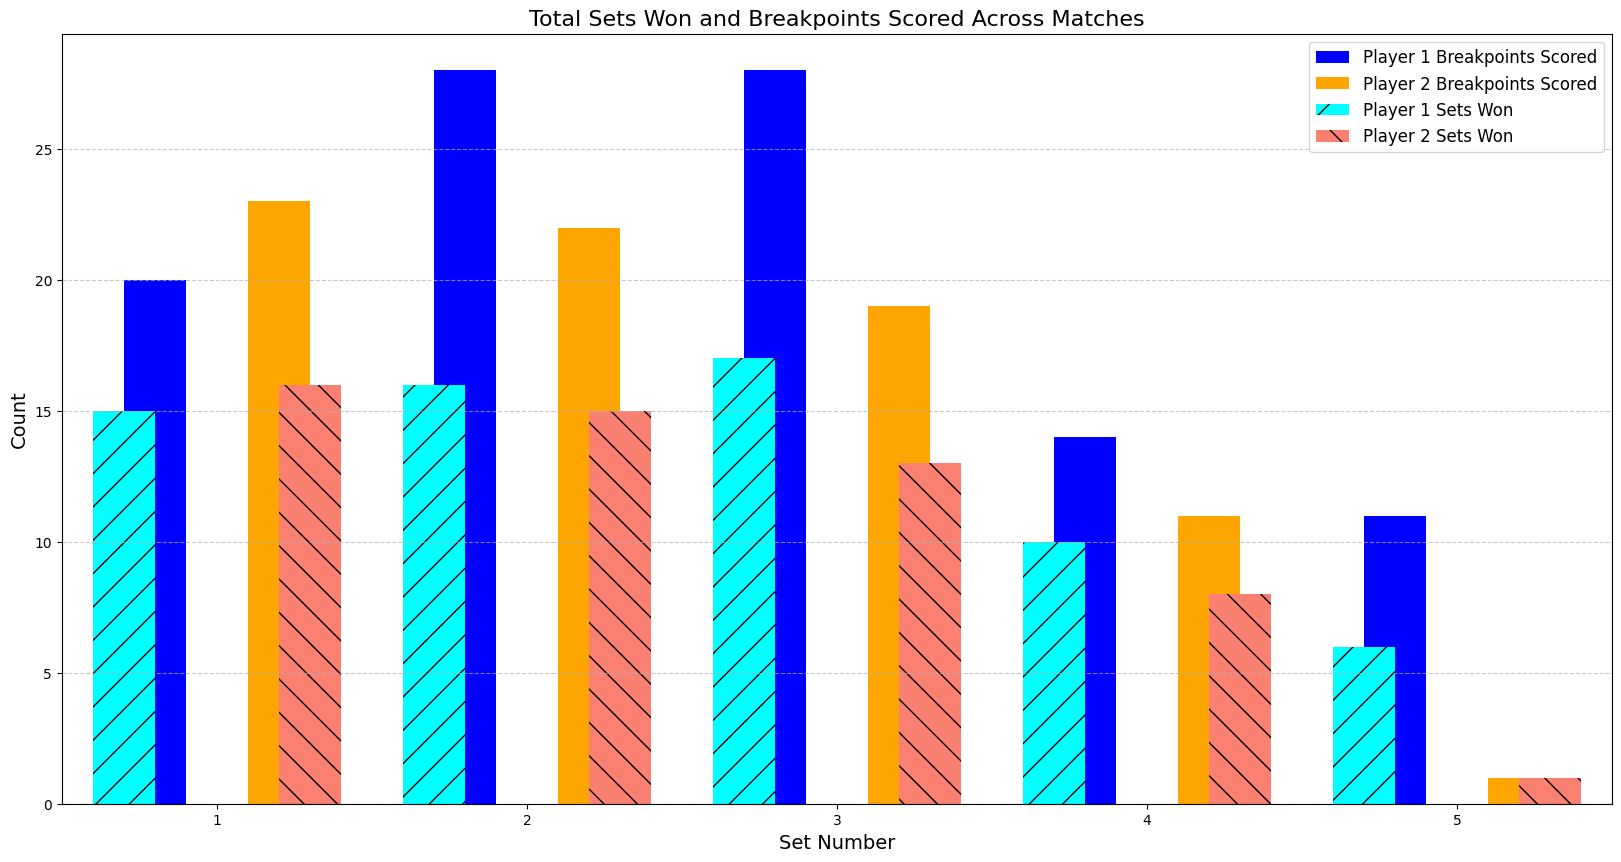

Total sets won by Player 1: 64
Total sets won by Player 2: 53
Correlation between Player 1's breakpoints won and total sets won: 0.94
Correlation between Player 2's breakpoints won and total sets won: 1.00


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the data is sorted by match, set, game, and point numbers
df = df_matches.sort_values(by=['match_id', 'set_no', 'game_no', 'point_no'])

# Aggregate data to determine set winners and breakpoint impacts per match and set
set_summary = df.groupby(['match_id', 'set_no']).agg({
    'set_victor': 'last',            # Last value in each set indicates the winner
    'p1_break_pt_won': 'sum',        # Total breakpoints won by Player 1
    'p2_break_pt_won': 'sum',        # Total breakpoints won by Player 2
}).reset_index()

# Add binary columns for set victories
set_summary['p1_set_winner'] = (set_summary['set_victor'] == 1).astype(int)  # 1 if Player 1 wins the set
set_summary['p2_set_winner'] = (set_summary['set_victor'] == 2).astype(int)  # 1 if Player 2 wins the set

# Calculate cumulative sets won within each match
set_summary['p1_cumulative_sets'] = set_summary.groupby('match_id')['p1_set_winner'].cumsum()
set_summary['p2_cumulative_sets'] = set_summary.groupby('match_id')['p2_set_winner'].cumsum()

# Determine the full range of set numbers
max_set_no = set_summary['set_no'].max()
full_set_range = range(1, max_set_no + 1)

# Aggregate totals across all matches, filling missing sets with 0
overall_summary = (
    set_summary.groupby('set_no')
    .agg({
        'p1_break_pt_won': 'sum',        # Total breakpoints won by Player 1 across all matches
        'p2_break_pt_won': 'sum',        # Total breakpoints won by Player 2 across all matches
        'p1_set_winner': 'sum',          # Total sets won by Player 1 across all matches
        'p2_set_winner': 'sum'           # Total sets won by Player 2 across all matches
    })
    .reindex(full_set_range, fill_value=0)  # Fill missing set numbers with 0
    .reset_index()
)

# Rename column for clarity
overall_summary.rename(columns={'index': 'set_no'}, inplace=True)

# Debugging: Print the aggregated overall_summary for verification
print(overall_summary)

# Plotting: Visualize set outcomes and breakpoints
plt.figure(figsize=(20, 10))

# Bar widths
bar_width = 0.2

# Breakpoints scored
plt.bar(overall_summary['set_no'] - bar_width, overall_summary['p1_break_pt_won'], width=bar_width, color='blue', label="Player 1 Breakpoints Scored")
plt.bar(overall_summary['set_no'] + bar_width, overall_summary['p2_break_pt_won'], width=bar_width, color='orange', label="Player 2 Breakpoints Scored")

# Sets won
plt.bar(overall_summary['set_no'] - 1.5 * bar_width, overall_summary['p1_set_winner'], width=bar_width, color='cyan', label="Player 1 Sets Won", hatch='/')
plt.bar(overall_summary['set_no'] + 1.5 * bar_width, overall_summary['p2_set_winner'], width=bar_width, color='salmon', label="Player 2 Sets Won", hatch='\\')

# Customize the plot
plt.title("Total Sets Won and Breakpoints Scored Across Matches", fontsize=16)
plt.xlabel("Set Number", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(full_set_range)  # Ensure all set numbers appear on the x-axis
plt.xlim(0.5, max_set_no + 0.5)  # Add padding to the x-axis range
plt.legend(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Print total sets won
total_p1_sets = overall_summary['p1_set_winner'].sum()
total_p2_sets = overall_summary['p2_set_winner'].sum()
print(f"Total sets won by Player 1: {total_p1_sets}")
print(f"Total sets won by Player 2: {total_p2_sets}")

# Calculate correlations
p1_correlation = overall_summary['p1_break_pt_won'].corr(overall_summary['p1_set_winner'])
p2_correlation = overall_summary['p2_break_pt_won'].corr(overall_summary['p2_set_winner'])

# Print correlation results
print(f"Correlation between Player 1's breakpoints won and total sets won: {p1_correlation:.2f}")
print(f"Correlation between Player 2's breakpoints won and total sets won: {p2_correlation:.2f}")
